<a href="https://colab.research.google.com/github/HandsomeJames0223/Deep_Learning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

In [ ]:
from keras.datasets.mnist import load_data
# ((訓練題目，訓練答案), (測試題目，測試答案))
((x_train, y_train), (x_test, y_test)) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 一定要做的步驟: 看一下訓練資料有幾筆
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


1


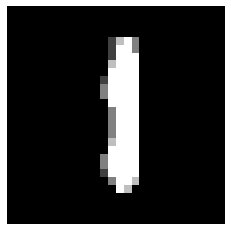

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap = "gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,64,191,255,128,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,128,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,255,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,191,255,255,255,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,64,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 資料預處理
# 1. 題目預處理(Normalize)
# Keras在準備隨機那組weights，跟Normalize的圖片比較搭
# 1. 第一種方式:0 - 1 第二種方式: -1 - 1
# 攤開 -> Keras MLP 規定一定要攤開成為1維
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# DEMO
x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# 2.答案預處理(One-hot encoding)
# 希望的樣子: [P0, P1, ..., P9]
# 5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 可能輸出: [0, 0, 0, 0.2, 0, 0.8, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# DEMO
print("原來:", y_train[1])
print("後來:", y_train_cat[1])

原來: 0
後來: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# 建立模型
# 第一種: 蛋糕支架(Sequential),堆上一層(Layers)
# Layers: Dense(全連接層)
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層: input_dim -> 告訴他輸入有多少個
# Param: 784 * 128 + 128(bias) = 100480
mlp.add(Dense(128, activation="relu", input_dim = 784))
mlp.add(Dense(10, activation="softmax"))
# Params: 128 * 10(神經元的連結) + 10(10個輸出，10個激活 -> 10個偏差) = 1290
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 確定模型訓練方式...等
# 隨機(隨便選一組weights)梯度(正確方向)下降
# loss: 最後輸出一個: binary_crossentropy; 最後輸出多個: categorical_crossentropy
# metrics: 多一個"accuracy"的輸出
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度，而有速度的累積)
mlp.compile(loss = "cateo99gorical_crossentropy",
            metrics = ["accuracy"],
            optimizer = "adam")

In [ ]:
# batch: 看幾筆(200)做一次梯度下降(修正)
# epochs: 整份考古題看幾次(10)
# 10個epochs，200batch: 60000 * 10 / 200 -> 3000(次)
mlp.fit(x_train_shape,
        y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split = 0.1,
        verbose = 2)

Epoch 1/10
270/270 - 1s - loss: 0.4336 - accuracy: 0.8830 - val_loss: 0.1991 - val_accuracy: 0.9453
Epoch 2/10
270/270 - 1s - loss: 0.2055 - accuracy: 0.9417 - val_loss: 0.1430 - val_accuracy: 0.9608
Epoch 3/10
270/270 - 1s - loss: 0.1517 - accuracy: 0.9570 - val_loss: 0.1184 - val_accuracy: 0.9683
Epoch 4/10
270/270 - 1s - loss: 0.1212 - accuracy: 0.9653 - val_loss: 0.1067 - val_accuracy: 0.9725
Epoch 5/10
270/270 - 1s - loss: 0.0989 - accuracy: 0.9716 - val_loss: 0.0935 - val_accuracy: 0.9742
Epoch 6/10
270/270 - 1s - loss: 0.0835 - accuracy: 0.9761 - val_loss: 0.0865 - val_accuracy: 0.9752
Epoch 7/10
270/270 - 1s - loss: 0.0716 - accuracy: 0.9798 - val_loss: 0.0832 - val_accuracy: 0.9768
Epoch 8/10
270/270 - 1s - loss: 0.0611 - accuracy: 0.9828 - val_loss: 0.0779 - val_accuracy: 0.9773
Epoch 9/10
270/270 - 1s - loss: 0.0529 - accuracy: 0.9848 - val_loss: 0.0783 - val_accuracy: 0.9782
Epoch 10/10
270/270 - 1s - loss: 0.0459 - accuracy: 0.9876 - val_loss: 0.0735 - val_accuracy: 0.9783

In [ ]:
# evaluate: 可以直接算出準確率
mlp.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9779


[0.07454004883766174, 0.9779000282287598]

In [ ]:
# predict: 機率 predict_classes: 分類
pre = mlp.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
# 正確答案和預測值的混淆矩陣
pd.DataFrame(confusion_matrix(y_test, pre))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0,1,2,3,4,5,6,7,8,9
0,975,0,0,1,0,1,1,1,1,0
1,0,1119,4,1,0,1,2,0,8,0
2,2,0,1009,3,2,0,2,6,8,0
3,0,0,3,989,1,5,0,3,5,4
4,1,0,1,1,958,0,5,2,3,11
5,3,0,0,7,3,865,6,1,5,2
6,8,2,1,1,3,4,934,1,4,0
7,1,2,7,4,1,0,0,1007,3,3
8,4,0,3,5,2,5,2,2,946,5
9,3,5,0,7,8,3,0,4,2,977


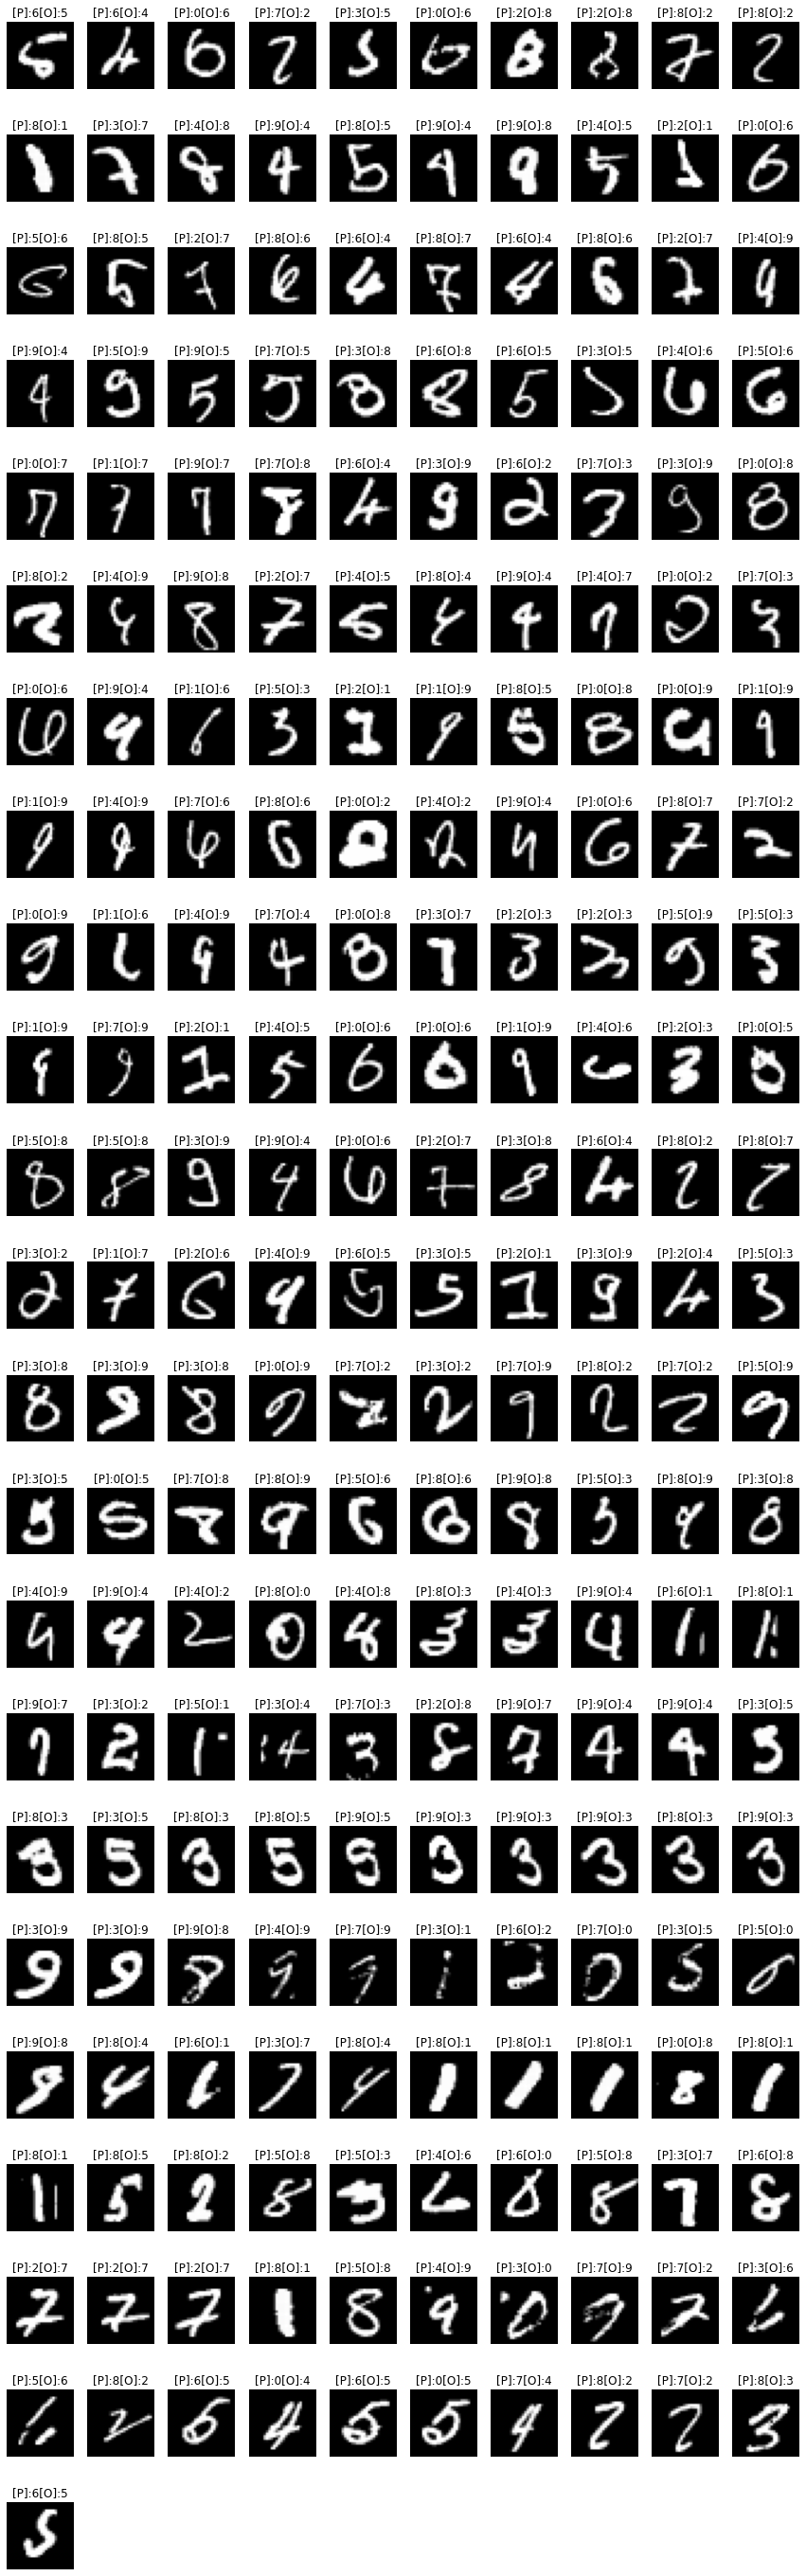

In [ ]:
# numpy才能這樣直接每個數字比較
import numpy as np
# list: list[一個數字]
# numpy array: nparray[ [多個數字] ]
diff = np.nonzero(pre != y_test)
# 預測錯誤的圖的原本標籤
orifalse = y_test[diff]
# 預測錯誤的圖的預測標籤
prefalse = pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 調整圖的大小
plt.figure(figsize=(15, 50))
# 每一列有十個
width = 10
height = int(len(imgfalse) / 10) + 1
# enumerate: 在圖旁邊加索引
for (i, img) in enumerate(imgfalse):
    # (列數，行數，第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    # 關閉座標數字
    plt.axis("off")
    # 標題內容
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    # 新增標題
    plt.title(t)
    # 秀出圖片
    plt.imshow(img, cmap = "gray")